simplicity(ps) =-16.0, mean_fitness(ps) =-0.7845565974712372, atomicity(ps) =0.0013723317083921675
Showing the linkage table


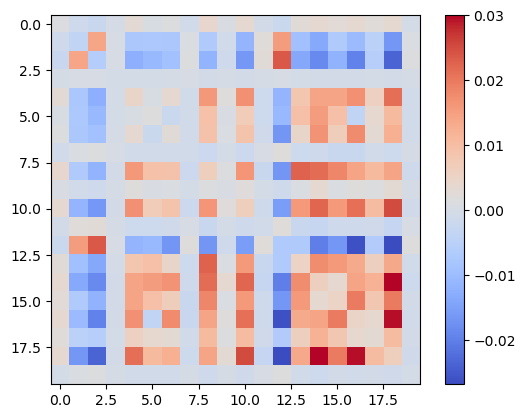

Showing the linkage table, rearranged


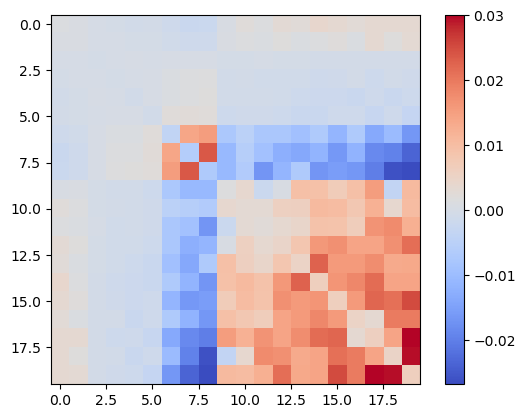

In [2]:
from PolishSystem.read_data import get_pRef_from_vectors, get_vectors_file_name, get_fitness_file_name
from rearrange_linkage_table import clean_table
from Core.PS import PS
from SimplifiedSystem.ps_search_utils import get_metric_function
from Core.PSMetric.Simplicity import Simplicity


# this section will generate the search objectives
size = 20
method = "qmc"
fitness_column_to_use = 0
data_folder = r"C:\Users\gac8\PycharmProjects\PSSearch\data\retail_forecasting"

pRef = get_pRef_from_vectors(get_vectors_file_name(data_folder, size, method), 
                                     get_fitness_file_name(data_folder, size, method), fitness_column_to_use)
best_solution = pRef.get_best_solution()

simplicity = get_metric_function("simplicity")
mean_fitness = get_metric_function("mean_fitness", pRef=pRef)
atomicity_evaluator, atomicity = get_metric_function("estimated_atomicity&evaluator", solution=best_solution, pRef = pRef)


ps = PS.from_string("1111"+"*"*(size-4))

print(f"{simplicity(ps) =}, {mean_fitness(ps) =}, {atomicity(ps) =}")

import numpy as np
import matplotlib.pyplot as plt
# Display the matrix using a colormap

def display_table_with_colours(table):
    # Display the matrix using a colormap
    plt.imshow(table, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()  # Add a color scale
    plt.show()

print("Showing the linkage table")
display_table_with_colours(atomicity_evaluator.linkage_table)

print("Showing the linkage table, rearranged")
display_table_with_colours(clean_table(atomicity_evaluator.linkage_table))


In [3]:
from PolishSystem.polish_search_methods import search_local_polish_ps
from SimplifiedSystem.search_methods import search_local_ps
from utils import announce
from SimplifiedSystem.PSSearchSettings import get_default_search_settings


search_settings = get_default_search_settings()
search_settings.verbose = True
search_settings.culling_method = "elbow"
with announce("Searching for a PS locally in the polish style"):
    new_pss = search_local_polish_ps(solution_to_explain=best_solution,
                              search_settings=search_settings,
                               objectives = [simplicity, mean_fitness, atomicity])
    new_pss.sort(key=lambda ps: ps.metric_scores[2])
    print(f"Found the following pss:")
    for ps in new_pss:
        print(f"\t{ps}, scores = {ps.metric_scores}")
    

Searching for a PS locally in the polish style...==========================================================================================
n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       52 |     11 |  0.000000E+00 |  0.000000E+00 |             - |             -
...Finished (took 0.084640 seconds)


AttributeError: 'BitflipMutation' object has no attribute 'n_offsprings'

In [ ]:
from PolishSystem.PolishOperators import DavidCairnsCrossover
from Core.FullSolution import FullSolution
    
def get_ps_for_solution(solution: FullSolution):
    search_settings = get_default_search_settings()
    search_settings.verbose = True
    search_settings.culling_method = "elbow"
    search_settings.crossover_operator = DavidCairnsCrossover(prob=0.3)
    new_pss = search_local_polish_ps(solution_to_explain=solution,
                                     search_settings=search_settings,
                                     objectives = [simplicity, mean_fitness, atomicity])
    return new_pss[0]



random_solutions = [pRef.get_random_evaluated_fs() for _ in range(10)]

list_of_lists = []
for solution in random_solutions:
    pss = [get_ps_for_solution(solution) for _ in range(10)]
    list_of_lists.append(pss)
    
    


print(list_of_lists)
    

In [ ]:
for solution, pss in zip(random_solutions, list_of_lists):
    print(f"The solution is {solution}")
    print("The PSs are:")
    for ps in pss:
        sample_size = len(pRef.fitnesses_of_observations(ps))
        print(f"\t{ps}, it has {sample_size} samples")

In [ ]:
display_table_with_colours(atomicity_evaluator.linkage_table)